In [ ]:
import os
import sys
import mne
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
x1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/042925/Q513_STM_tone_nonoise.bdf'
x2='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/042925/Q513_STM_tone_nonoise+001.bdf'
raw1, eves1 = bs.importbdf(x1, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
raw2, eves2 = bs.importbdf(x2, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
rawlist=[raw1,raw2]
eveslist=[eves1,eves2]
raw,eves=mne.concatenate_raws(rawlist, events_list=eveslist)



In [ ]:
## analysis of new stim with fading out cosine ramp
raw.filter(5.,20.)
epochs_1= mne.Epochs(raw, eves, event_id=1, baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6),detrend=1)
epochs_2= mne.Epochs(raw, eves, event_id=2, baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6),detrend=1)
t_full=epochs_1.times
picks = (6, 7, 8,21, 22, 23, 28, 29, 13)

ep1_all=(epochs_1.get_data()[:,picks,:]).mean(axis=1)
ep2_all=(epochs_2.get_data()[:,picks,:]).mean(axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ep1_mean=ep1_all.mean(axis=0)
ep1_sem=ep1_all.std(axis=0)/np.sqrt(ep1_all.shape[0])
ep2_mean=ep2_all.mean(axis=0)
ep2_sem=ep2_all.std(axis=0)/np.sqrt(ep2_all.shape[0])


plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(t_full, ep1_mean,label='trig-1',color='blue')
plt.fill_between(t_full, ep1_mean-ep1_sem, ep1_mean+ep1_sem,alpha=0.3,color='blue')

plt.subplot(1,2,2)
plt.plot(t_full, ep2_mean,label='trig-2',color='red')
plt.fill_between(t_full, ep2_mean-ep2_sem, ep2_mean+ep2_sem,alpha=0.3,color='red')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
ep1_sub=(epochs_1.get_data()[:,35,:]-epochs_1.get_data()[:,36,:])
ep2_sub=(epochs_2.get_data()[:,35,:]-epochs_2.get_data()[:,36,:])

ep1_mean=ep1_sub.mean(axis=0)
ep1_sem=ep1_sub.std(axis=0)/np.sqrt(ep1_sub.shape[0])
ep2_mean=ep2_sub.mean(axis=0)
ep2_sem=ep2_sub.std(axis=0)/np.sqrt(ep2_sub.shape[0])

ep1_sub=(epochs_1.get_data()[0:99,35,:])-(epochs_1.get_data()[0:99,36,:])
ep2_sub=(epochs_2.get_data()[0:99,35,:])-(epochs_2.get_data()[0:99,36,:])

ep1_sub=(detrend(ep1_sub,axis=1)).mean(axis=0)
ep2_sub=(detrend(ep2_sub,axis=1)).mean(axis=0)


plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(t_full, ep1_sub,label='trig-1',color='blue')
plt.fill_between(t_full, ep1_mean-ep1_sem, ep1_mean+ep1_sem,alpha=0.3,color='blue')

plt.subplot(1,2,2)
plt.plot(t_full, ep2_sub,label='trig-2',color='red')
#plt.fill_between(t_full, ep2_mean-ep2_sem, ep2_mean+ep2_sem,alpha=0.3,color='red')


In [ ]:
import os
import sys
import mne
import glob
import numpy as np
file='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/042925/'
os.chdir(file)
bdfs=glob.glob("*.bdf")
bdfs.sort(key=os.path.getmtime)
rawlist=[]
eveslist=[]
picks=(np.arange(0,32))
buffer=[]
for bdf in bdfs:
    rawtemp,evestemp=bs.importbdf(file+'/'+bdf,verbose='DEBUG',refchans=['EXG1', 'EXG2'])
    rawtemp.filter(2.,20.)
    epochstemp=mne.Epochs(rawtemp, evestemp, event_id=[1,2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6))
    buffer.append(epochstemp.get_data()[:,picks,:])

ep_all=np.concatenate(buffer,axis=0)

In [ ]:
import os
import sys
import mne
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs

data_dir='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/051425/'
output_dir='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/epochs/'

bdf_files = [f for f in os.listdir(data_dir) if (f.endswith('.bdf') & (not ('+' in f)) )]

for bdf in bdf_files:
    files=[f for f in os.listdir(data_dir) if (bdf in f)]
    if len(files)>1:
        files.sort(key=os.path.getmtime)
    rawlist=[]
    eveslist=[]
    for fl in files:
        rawtemp,evestemp=bs.importbdf(data_dir+fl,verbose='DEBUG',refchans=['EXG1','EXG2'])
        rawlist+=[rawtemp, ]
        eveslist+=[evestemp, ]
    raw, eves = mne.concatenate_raws(rawlist, events_list=eveslist)
    raw.filter(5.,20.)

    epochs_1=mne.Epochs(raw,eves,event_id=1,proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6))
    epochs_2=mne.Epochs(raw,eves,event_id=2,proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6))

    save_name=f"{files}_epoch_1_epo.fif"
    save_path=os.path.join(output_dir,bdf)
    epochs_1.save(save_path,overwrite=True)

    save_name=f"{files}_epoch_2_epo.fif"
    save_path=os.path.join(output_dir,bdf)
    epochs_2.save(save_path,overwrite=True)



Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\MP\Chin EEG data\bdf data\051425\Q509_stmtone_12dB.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
303 events found on stim channel Status
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    9.3s


Not setting metadata
151 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
151 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 151 events and 20481 original time points ...
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A4']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
5 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from preloaded Raw for 146 events and 20481 original time points ...
Using data from preloaded Raw for 151 events and 20481 original time points ...
    Rejecting  epoch based on EEG : ['A1']
1 bad epochs dropped
Using data from preloaded 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.2s


Not setting metadata
50 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
50 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 50 events and 20481 original time points ...
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A4', 'A19']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1', 'A4']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
10 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from pr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    9.1s


Not setting metadata
151 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
151 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 151 events and 20481 original time points ...
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1', 'A2', 'A3', 'A4', 'A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A4']
    Rejecting  epoch based on EEG : ['A1']
    Rejecting  epoch based on EEG : ['A1', 'A3', 'A4']
    Rejecting  epoch based on EEG : ['A1']
11 bad epochs dropped
Using data from pr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    9.4s


Not setting metadata
150 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 150 events and 20481 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from preloaded Raw for 150 events and 20481 original time points ...
Using data from preloaded Raw for 150 events and 20481 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from preloaded Raw for 150 events and 20481 original time points ...
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\MP\Chin EEG da

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Not setting metadata
6 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
8 matching events found
Setting baseline interval to [-0.300048828125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 6 events and 20481 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from preloaded Raw for 6 events and 20481 original time points ...
Using data from preloaded Raw for 8 events and 20481 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 20481 original time points ...
Using data from preloaded Raw for 8 events and 20481 original time points ...


In [23]:
files.sort(key=os.path.getmtime)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Q514_Freqshift_noise6dB.bdf'

In [ ]:
t_full=epochs_1.times
spont_win=np.where((t_full>-0.3) & (t_full<=0))
resp_win=np.where((t_full>0) & (t_full<=2.2))
window=50
step=25
all_mean_spont=[]
all_sem_spont=[]
all_mean_resp=[]
all_sem_resp=[]
for ii in range(0,ep_all.shape[0]-window+1,step):
    ep_spont=np.squeeze(ep_all[ii:ii+window,:,spont_win].mean(axis=0))
    ep_resp=np.squeeze(ep_all[ii:ii+window,:,resp_win].mean(axis=0))
    corr_spont=np.corrcoef(ep_spont)
    corr_resp=np.corrcoef(ep_resp)

    i,j=np.tril_indices_from(corr_spont,k=-1)
    lower_vals=corr_spont[i,j]
    mean_lower=lower_vals.mean()
    std_lower=lower_vals.std(ddof=0)/np.sqrt(lower_vals.size)
    all_mean_spont.append(mean_lower)
    all_sem_spont.append(std_lower)

    i,j=np.tril_indices_from(corr_resp,k=-1)
    lower_vals=corr_resp[i,j]
    mean_lower=lower_vals.mean()
    std_lower=lower_vals.std(ddof=0)/np.sqrt(lower_vals.size)
    all_mean_resp.append(mean_lower)
    all_sem_resp.append(std_lower)

    #ep1=ep_all[ii:ii+window,:,:].mean(axis=0)
    #corr=np.corrcoef(ep1)
    #i,j=np.tril_indices_from(corr,k=-1)
    #lower_vals=corr[i,j]
    #mean_lower=lower_vals.mean()
    #std_lower=lower_vals.std(ddof=0)/np.sqrt(lower_vals.size)
    #all_mean.append(mean_lower)
    #all_sem.append(std_lower)

all_mean_spont=np.array(all_mean_spont)
all_sem_spont=np.array(all_sem_spont)

all_mean_resp=np.array(all_mean_resp)
all_sem_resp=np.array(all_sem_resp)

#plt.figure()
#plt.plot(np.arange(len(all_mean)),all_mean,color='blue')
#plt.fill_between(np.arange(len(all_mean)), all_mean-all_sem, all_mean+all_sem,alpha=0.3,color='blue')

plt.figure
plt.plot(np.arange(len(all_mean_resp)),all_mean_resp,color='blue')
plt.fill_between(np.arange(len(all_mean_resp)), all_mean_resp-all_sem_resp, all_mean_resp+all_sem_resp,alpha=0.3,color='blue')

plt.plot(np.arange(len(all_mean_spont)),all_mean_spont,color='red')
plt.fill_between(np.arange(len(all_mean_spont)), all_mean_spont-all_sem_spont, all_mean_spont+all_sem_spont,alpha=0.3,color='red')



In [ ]:
t_full

In [ ]:
## 

import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Chin EEG/bdf data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("0"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        
        for fl in fl2:
            if ("STM" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
              
               
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                    
                if raw.info["sfreq"]>8192:
                     raw, eves = raw.resample(8192, events=eves)
                raw.filter(1.,4.)
                if  "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list = eves[1:len(eves),2]
                
        
                eid=np.ndarray.tolist(np.unique(trig_list))
                    
             
                if "_3stim" in fl:
                    epochs = mne.Epochs(raw, eves, event_id=eid, baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs = mne.Epochs(raw, eves, event_id=eid, baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    
                t_full = epochs.times
                ep1=epochs.get_data()
                if len(trig_list[epochs.selection-1])!=ep1.shape[0]:
                    qwert
                
                    
                mat_gap = dict(epochs=epochs.get_data(), trig_list=trig_list[epochs.selection-1],t=t_full)
                w1=s3+'_theta.mat'
                print(w1)
                savemat(w1,mat_gap)
               
                        
               
        os.chdir(s1)        

In [ ]:
import mne
epochs = mne.Epochs(raw, eves, event_id=[1,2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)

In [ ]:
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Chin EEG/bdf data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("0"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if ("STM" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                if raw.info["sfreq"]>8192:
                    raw, eves = raw.resample(8192, events=eves)
                raw.filter(1.,90.)
                if "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list=eves[1:len(eves),2]
                eid=np.ndarray.tolist(np.unique(trig_list))
                if len(eid)<2:
                    continue
                
                
                if "_3stim" in fl:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                
                mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),t=epochs_1.times)
                w1=s3+'_lp_90.mat'
                print(w1)
                savemat(w1,mat_gap)
        os.chdir(s1)
                
                
            
        

In [ ]:
## bulk chin bdf to mat conversion for ACC stimulus
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Human EEG data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("MP"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if ("MP" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                if raw.info["sfreq"]>8192:
                    raw, eves = raw.resample(8192, events=eves)
                raw.filter(8.,12.)
                blinks = find_blinks(raw)
                epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
                blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
                raw.add_proj(blink_proj)
                if "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list=eves[1:len(eves),2]
                eid=np.ndarray.tolist(np.unique(trig_list))
                if len(eid)<2:
                    continue
                
                
                if "_3stim" in fl:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                
                mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),t=epochs_1.times)
                w1=s3+'_alpha.mat'
                print(w1)
                savemat(w1,mat_gap)
        os.chdir(s1)
                
                
            

In [ ]:
### example human bdf to mat MP
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import mne
from scipy.io import savemat
import numpy as np
from anlffr.preproc import find_blinks
x1='Z:/data/UserTESTS/MP/Human EEG data/S381/'
s1='S381_STM_MP.bdf'
raw, eves = bs.importbdf(x1+s1, verbose='DEBUG',refchans=['EXG1','EXG2'])
raw.filter(1.,40.)

blinks = find_blinks(raw)
epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
raw.add_proj(blink_proj)

epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_3 = mne.Epochs(raw, eves, event_id=[3], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_4 = mne.Epochs(raw, eves, event_id=[4], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)

mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),epochs_3=epochs_3.get_data(),epochs_4=epochs_4.get_data(),t=epochs_1.times)
w1=s3+'_1-40.mat'
print(w1)
savemat(w1,mat_gap)

In [ ]:
## bulk bdf to mat for varsha's binding data for humans

import sys
import os
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
s1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("S"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if (("Binding" in fl) & ~("bdf_" in fl)) & ~("ABR" in fl):
                s3=s2+fl
                print(s3)
                try:
                    raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                    if eves.shape[0]==0:
                        continue
                    if raw.info["sfreq"]>4096:
                        raw, eves = raw.resample(4096, events=eves)
                    raw.filter(4.,7.)
                    if "+00" in fl:
                        trig_list=eves[:,2]
                    else:
                        trig_list=eves[1:len(eves),2]
                    eid=np.ndarray.tolist(np.unique(trig_list))
                
                    #blinks = find_blinks(raw)
                    #epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
                    #blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
                    #raw.add_proj(blink_proj)
                    
                    epochs_12 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    epochs_20 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    
                    t_full=epochs_12.times
                    mat_gap=dict(epochs_12=epochs_12.get_data(),epochs_20=epochs_20.get_data(), t=t_full)     
                    w1=s3+'_theta.mat'
                    print(w1)
                    savemat(w1,mat_gap)
                except:
                    continue
        os.chdir(s1)

In [ ]:
## bulk bdf to mat for varsha's binding data for chins

import sys
import os
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
s1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("Q"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if (("Binding" in fl) & ~("bdf_" in fl)) & ~("ABR" in fl):
                s3=s2+fl
                print(s3)
                try:
                    raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                    if eves.shape[0]==0:
                        continue
                    if raw.info["sfreq"]>4096:
                        raw, eves = raw.resample(4096, events=eves)
                    raw.filter(8.,12.)
                    if "+00" in fl:
                        trig_list=eves[:,2]
                    else:
                        trig_list=eves[1:len(eves),2]
                    eid=np.ndarray.tolist(np.unique(trig_list))
                    epochs_12 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    t_full=epochs_12.times
                    if len(eid)>1:
                        epochs_8 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                        mat_gap=dict(epochs_12=epochs_12.get_data(),epochs_8=epochs_8.get_data(),t=t_full)
                    else:
                        mat_gap=dict(epochs_12=epochs_12.get_data(),t=t_full)
                    w1=s3+'_alpha.mat'
                    print(w1)
                    savemat(w1,mat_gap)
                except:
                    continue
        os.chdir(s1)

In [64]:
## 20 sec stim plot
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import mne
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
x1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/052925/Q514_freqchange_20s_1ssegment_freqmod.bdf'
raw,eves=bs.importbdf(x1, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
raw.filter(5.,20.)

Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\MP\Chin EEG data\bdf data\052925\Q514_freqchange_20s_1ssegment_freqmod.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5898239  =      0.000 ...   720.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
31 events found on stim channel Status
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transit

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.7s


<RawEDF | Q514_freqchange_20s_1ssegment_freqmod.bdf, 41 x 5898240 (720.0 s), ~1.80 GiB, data loaded>

Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 166299 original time points ...
0 bad epochs dropped


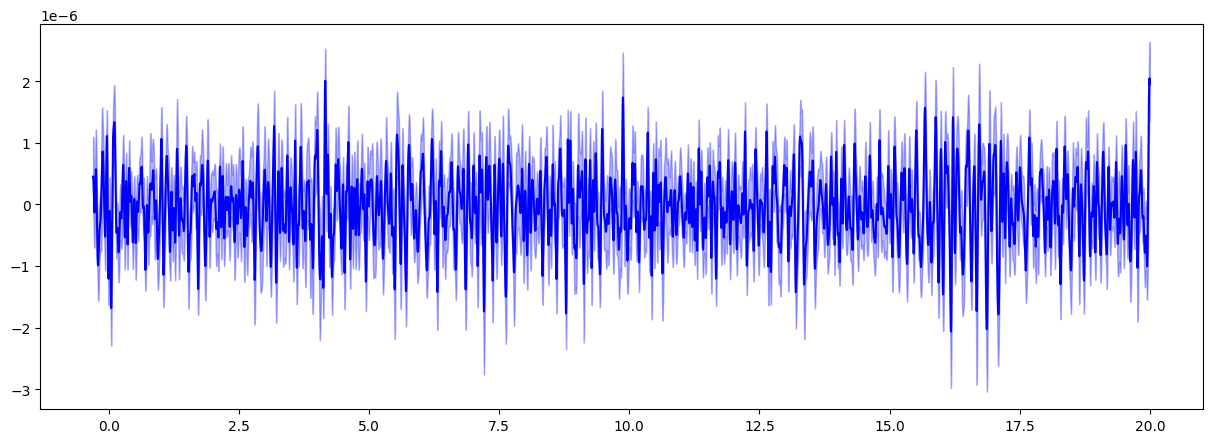

In [65]:
epochs= mne.Epochs(raw, eves, event_id=[1,2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=20, reject=dict(eeg=200e-6))
t_full=epochs.times
picks = (6, 7, 8,21, 22, 23, 28, 29, 13)

ep_all=(epochs.get_data()[:,picks,:]).mean(axis=1)

ep_mean=ep_all.mean(axis=0)
ep_sem=ep_all.std(axis=0)/np.sqrt(ep_all.shape[0])

plt.figure(figsize=(15, 5))
plt.plot(t_full, ep_mean,label='trig-1',color='blue')
plt.fill_between(t_full, ep_mean-ep_sem, ep_mean+ep_sem,alpha=0.3,color='blue')

In [ ]:
trig_p=int(np.fix(0.3*raw.info['sfreq']))
stm_dur=int(np.fix(20*raw.info['sfreq']))

spnt=ep_all[:,0:trig_p]
resp=ep_all[:,trig_p+1:trig_p+1+stm_dur]
num_seg_itr=10 # number of same segments in one iter 
dur_seg=2 # duration of each segment in sec.
t_stm = np.linspace(0, dur_seg, dur_seg*int(raw.info['sfreq']), endpoint=False)
resp_arr=resp.reshape(30,num_seg_itr,dur_seg*int(raw.info['sfreq']))

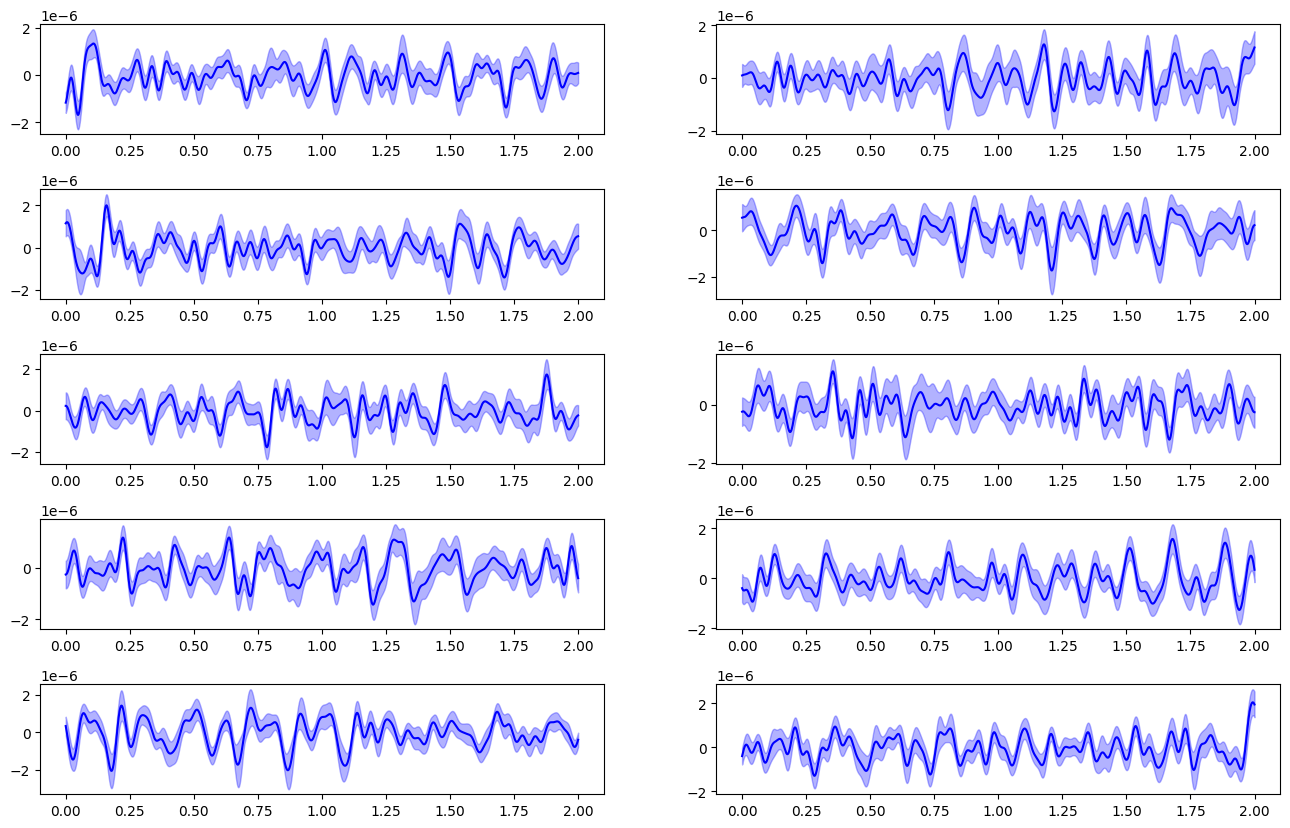

In [ ]:

nsz=resp_arr.shape[1] # if want to do across time, change [1] to [0]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 10))
axes = axes.flatten()
for ii in range(nsz):
    y=np.squeeze(resp_arr[:,ii,:])# if want to do across time change [:,ii,:] to [ii,:,:]
    y_mean=y.mean(axis=0)
    y_sem=y.std(axis=0)/np.sqrt(y.shape[0])
    axes[ii].plot(t_stm, y_mean,label='trig-1',color='blue')
    axes[ii].fill_between(t_stm, y_mean-y_sem, y_mean+y_sem,alpha=0.3,color='blue')
    #axes[ii].set_ylim(-2.5e-6, 2.5e-6)

plt.subplots_adjust(hspace=0.5)

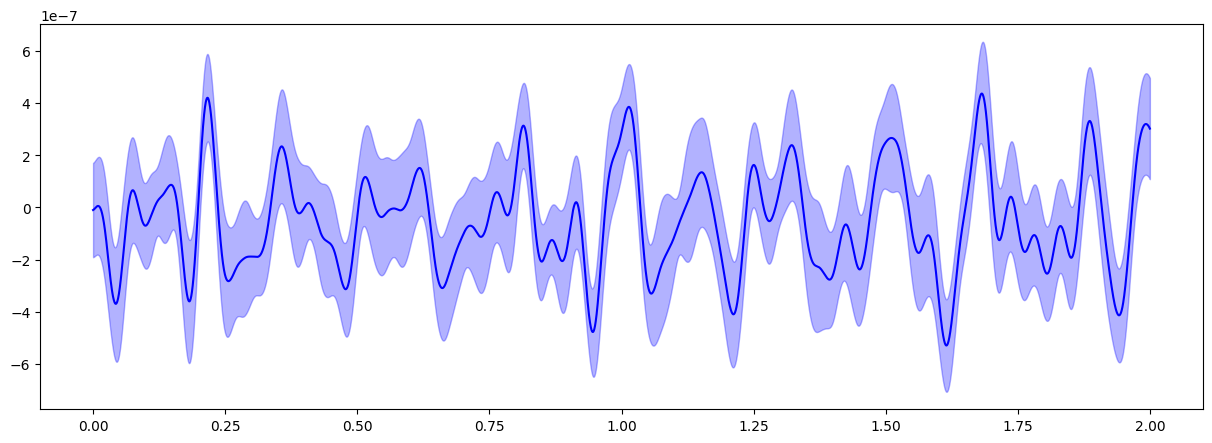

In [94]:
nms=np.squeeze(resp_arr.mean(axis=1))

nms_mean=nms.mean(axis=0)
nms_sem=nms.std(axis=0)/np.sqrt(nms.shape[0])
plt.figure(figsize=(15, 5))
plt.plot(t_stm, nms_mean,label='trig-1',color='blue')
plt.fill_between(t_stm, nms_mean-nms_sem, nms_mean+nms_sem,alpha=0.3,color='blue')

In [86]:
resp_arr.shape

(30, 10, 16384)

In [90]:
dur_seg=2
t_stm = np.linspace(0, dur_seg, dur_seg*int(raw.info['sfreq']), endpoint=False)

In [91]:
t_stm.shape

(16384,)